In [155]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [156]:
df = pd.read_csv('subway_delay-winter-2019.csv')

In [157]:
df

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle
0,2019-11-01,BD,15:28,Friday,WARDEN STATION,SUDP,19,22,E,5209
1,2019-11-01,YU,21:49,Friday,UNION STATION,MUI,16,19,N,6001
2,2019-11-01,YU,00:00,Friday,GLENCAIRN STATION,MUI,15,20,S,5526
3,2019-11-01,BD,07:35,Friday,OSSINGTON STATION,SUDP,10,12,E,5209
4,2019-11-01,BD,17:53,Friday,YONGE BD STATION,MUDD,10,12,W,5091
...,...,...,...,...,...,...,...,...,...,...
4371,2020-01-31,BD,21:55,Friday,WARDEN STATION,TUMVS,0,0,W,5100
4372,2020-01-31,YU/BD,22:00,Friday,YONGE-UNIVERSITY AND B,MUO,0,0,NaN,0
4373,2020-01-31,YU,22:26,Friday,SHEPPARD WEST STATION,PUMEL,0,0,NaN,0
4374,2020-01-31,YU,22:28,Friday,ST CLAIR STATION,MUI,0,0,N,5636


In [158]:
df = df[df['Delay'] >= 10]
len(df)

208

In [159]:
df['datetime'] = df['Report Date'] + ' ' + df['Time']

/var/folders/zw/x46df3ms6r5391lyb_y98z600000gn/T/ipykernel_14813/380852963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = df['Report Date'] + ' ' + df['Time']


In [160]:
df['datetime'] = pd.to_datetime(df['datetime'])

/var/folders/zw/x46df3ms6r5391lyb_y98z600000gn/T/ipykernel_14813/521933466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 4314
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Report Date  208 non-null    object        
 1   Route        208 non-null    object        
 2   Time         208 non-null    object        
 3   Day          208 non-null    object        
 4   Location     208 non-null    object        
 5   Incident     208 non-null    object        
 6   Delay        208 non-null    int64         
 7   Gap          208 non-null    int64         
 8   Directoin    207 non-null    object        
 9   Vehicle      208 non-null    int64         
 10  datetime     208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 19.5+ KB


In [162]:
df = df[(df['datetime'] >'2019-11-27') & (df['datetime'] < '2020-01-05')]

In [163]:
df['dow'] = df['datetime'].dt.weekday

In [164]:
df['hour'] = df['datetime'].dt.hour

In [165]:
df['minute'] = df['datetime'].dt.minute

In [166]:
df[df['datetime'].dt.date.astype(str) == '2019-12-02'].sort_values(by = 'Delay', ascending = False)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1493,2019-12-02,BD,06:59,Monday,DUNDAS WEST STATION,MUPLB,176,180,W,5030,2019-12-02 06:59:00,0,6,59
1494,2019-12-02,BD,09:31,Monday,CHESTER STATION,MUPLB,21,23,W,5298,2019-12-02 09:31:00,0,9,31
1495,2019-12-02,BD,22:48,Monday,SHERBOURNE STATION,SUAP,16,21,E,5207,2019-12-02 22:48:00,0,22,48
1496,2019-12-02,BD,00:13,Monday,YORK UNIVERSITY STATIO,MUATC,13,17,N,6056,2019-12-02 00:13:00,0,0,13
1497,2019-12-02,BD,08:35,Monday,CHESTER STATION,MUPLB,11,13,W,5258,2019-12-02 08:35:00,0,8,35


In [167]:
df[df['Incident'] == 'General Delay']

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute


In [168]:
df[df['Gap']/df['Delay'] == 2]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute


In [169]:
df[df['Gap']%df['Delay'] == 0]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1425,2019-11-30,YU,05:59,Saturday,DUNDAS STATION,SUDP,12,0,N,5676,2019-11-30 05:59:00,5,5,59
1613,2019-12-04,BD,04:57,Wednesday,YONGE BD STATION,PUTWZ,11,0,W,5042,2019-12-04 04:57:00,2,4,57
1614,2019-12-04,BD,05:55,Wednesday,YONGE BD STATION,PUTWZ,11,0,W,5042,2019-12-04 05:55:00,2,5,55
2732,2019-12-25,YU,07:43,Wednesday,SHEPPARD WEST STATION,TUCC,20,0,N,5526,2019-12-25 07:43:00,2,7,43


In [170]:
df.sort_values(by = 'Delay', ascending = False).head(20)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
1493,2019-12-02,BD,06:59,Monday,DUNDAS WEST STATION,MUPLB,176,180,W,5030,2019-12-02 06:59:00,0,6,59
2809,2019-12-27,YU,12:36,Friday,PIONEER VILLAGE STATIO,MUPR1,162,166,N,5686,2019-12-27 12:36:00,4,12,36
1873,2019-12-09,YU,13:39,Monday,GLENCAIRN STATION,SUBT,100,103,N,5466,2019-12-09 13:39:00,0,13,39
2518,2019-12-21,BD,23:46,Saturday,YONGE BD STATION,MUIR,50,56,W,5206,2019-12-21 23:46:00,5,23,46
2931,2019-12-30,BD,08:02,Monday,KIPLING STATION,PUSSW,46,50,E,5128,2019-12-30 08:02:00,0,8,2
2380,2019-12-19,BD,14:04,Thursday,HIGH PARK STATION,MUI,36,39,E,5232,2019-12-19 14:04:00,3,14,4
2028,2019-12-12,SRT,15:12,Thursday,LAWRENCE EAST STATION,ERTC,31,36,N,3002,2019-12-12 15:12:00,3,15,12
1610,2019-12-04,YU,17:05,Wednesday,ALLEN RD (N OF EGLINTO,MUO,28,32,N,5651,2019-12-04 17:05:00,2,17,5
2446,2019-12-20,BD,21:45,Friday,DUNDAS WEST STATION,SUO,26,30,E,5287,2019-12-20 21:45:00,4,21,45
3145,2020-01-04,YU,22:44,Saturday,ST PATRICK STATION,MUI,25,30,S,5761,2020-01-04 22:44:00,5,22,44


In [171]:
df['date_str'] = df['datetime'].dt.date.astype(str)

In [172]:
df.groupby(['date_str', 'Route']).count().sort_values(by = 'Report Date', ascending = False)

,,Report Date,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute
date_str,Route,,,,,,,,,,,,,
2019-12-02,BD,5,5,5,5,5,5,5,5,5,5,5,5,5
2019-12-07,YU,5,5,5,5,5,5,5,5,5,5,5,5,5
2019-12-04,BD,3,3,3,3,3,3,3,3,3,3,3,3,3
2019-12-06,BD,3,3,3,3,3,3,3,3,3,3,3,3,3
2019-11-27,YU,3,3,3,3,3,3,3,3,3,3,3,3,3
2020-01-02,YU,3,3,3,3,3,3,3,3,3,3,3,3,3
2019-12-08,YU,3,3,3,3,3,3,3,3,3,3,3,3,3
2019-12-30,BD,3,3,3,3,3,3,3,3,3,3,3,3,3
2019-12-12,YU,3,3,3,3,3,3,3,3,3,3,3,3,3


In [173]:
df[(df['Route'] == 'YU') & (df['date_str'] == '2019-12-10')]

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Directoin,Vehicle,datetime,dow,hour,minute,date_str
1927,2019-12-10,YU,01:29,Tuesday,SHEPPARD WEST STATION,SUAE,15,20,S,6091,2019-12-10 01:29:00,1,1,29,2019-12-10
1928,2019-12-10,YU,13:16,Tuesday,ST CLAIR STATION,MUI,15,18,S,5701,2019-12-10 13:16:00,1,13,16,2019-12-10


In [174]:
clean_list = []

for index, row in df.iterrows():
        
    new_hour = row['hour']
    delay = row['Delay']
    minute = row['minute']
    new_date = row['datetime'].date()
    new_dow = new_dow = new_date.weekday()
    clean_list.append([row['datetime'].date(), row['dow'], row['hour'], row['Route']])
    
    if delay + minute > 60:

            
        for i in range(int((delay + minute)/60)):
            new_hour = new_hour + 1
            if new_hour > 23:
                new_hour = new_hour - 24
                new_date = row['datetime'].date() + datetime.timedelta(days=1)
                new_dow = new_date.weekday()

            clean_list.append([new_date, new_dow, new_hour, row['Route']])       

    else:
        pass

In [175]:
cleaned = pd.DataFrame.from_records(clean_list, columns = ['date', 'dow', 'hour', 'route'])
cleaned

,date,dow,hour,route
0,2019-11-27,2,19,YU
1,2019-11-27,2,16,BD
2,2019-11-27,2,0,YU
3,2019-11-27,2,16,BD
4,2019-11-27,2,23,YU
...,...,...,...,...
122,2020-01-02,3,0,YU
123,2020-01-03,4,6,YU
124,2020-01-04,5,22,YU
125,2020-01-04,5,23,YU


In [176]:
cleaned = cleaned[~cleaned['date'].astype(str).isin(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-31', '2020-01-01'])].copy()

In [177]:
cleaned['period'] = None

In [178]:
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([7,8,9])), 'AM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([4,5,6])), 'EM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([11,12,13])), 'MD', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([17,18,19])), 'PM', cleaned['period'])
cleaned['period'] = np.where((cleaned['dow'] < 5) & (cleaned['hour'].isin([20,21,22])), 'EV', cleaned['period'])

In [179]:
cleaned = cleaned[(~cleaned['period'].isna()) ].reset_index(drop = True)
cleaned

,date,dow,hour,route,period
0,2019-11-27,2,19,YU,PM
1,2019-11-28,3,21,BD,EV
2,2019-11-28,3,6,YU,EM
3,2019-12-02,0,6,BD,EM
4,2019-12-02,0,7,BD,AM
5,2019-12-02,0,8,BD,AM
6,2019-12-02,0,9,BD,AM
7,2019-12-02,0,9,BD,AM
8,2019-12-02,0,22,BD,EV
9,2019-12-02,0,8,BD,AM


In [180]:
summary = cleaned.groupby(['date', 'period']).count()[['route']].reset_index().rename(columns = {'route':'incidents'})

In [181]:
len(summary[summary['period'] == 'AM'])

7

In [182]:
summary[summary['period'] == 'AM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
3,2019-12-02,AM,5
11,2019-12-06,AM,1
16,2019-12-12,AM,1
19,2019-12-13,AM,1
22,2019-12-18,AM,1
24,2019-12-19,AM,1
31,2019-12-30,AM,1


In [183]:
summary[summary['period'] == 'PM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
26,2019-12-19,PM,3
14,2019-12-09,PM,2
28,2019-12-20,PM,2
32,2019-12-30,PM,2
0,2019-11-27,PM,1
7,2019-12-03,PM,1
10,2019-12-04,PM,1
18,2019-12-12,PM,1
20,2019-12-13,PM,1
23,2019-12-18,PM,1


In [184]:
summary[summary['period'] == 'MD'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
9,2019-12-04,MD,2
13,2019-12-09,MD,2
30,2019-12-27,MD,2
15,2019-12-10,MD,1
17,2019-12-12,MD,1
33,2020-01-02,MD,1


In [185]:
summary[summary['period'] == 'EV'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
6,2019-12-03,EV,3
25,2019-12-19,EV,3
27,2019-12-20,EV,3
21,2019-12-17,EV,2
29,2019-12-23,EV,2
2,2019-11-28,EV,1
5,2019-12-02,EV,1


In [186]:
summary[summary['period'] == 'EM'].sort_values(by = 'incidents', ascending = False)

,date,period,incidents
8,2019-12-04,EM,4
1,2019-11-28,EM,1
4,2019-12-02,EM,1
12,2019-12-09,EM,1
35,2020-01-03,EM,1


In [187]:
plt.rcParams['figure.dpi'] = 300

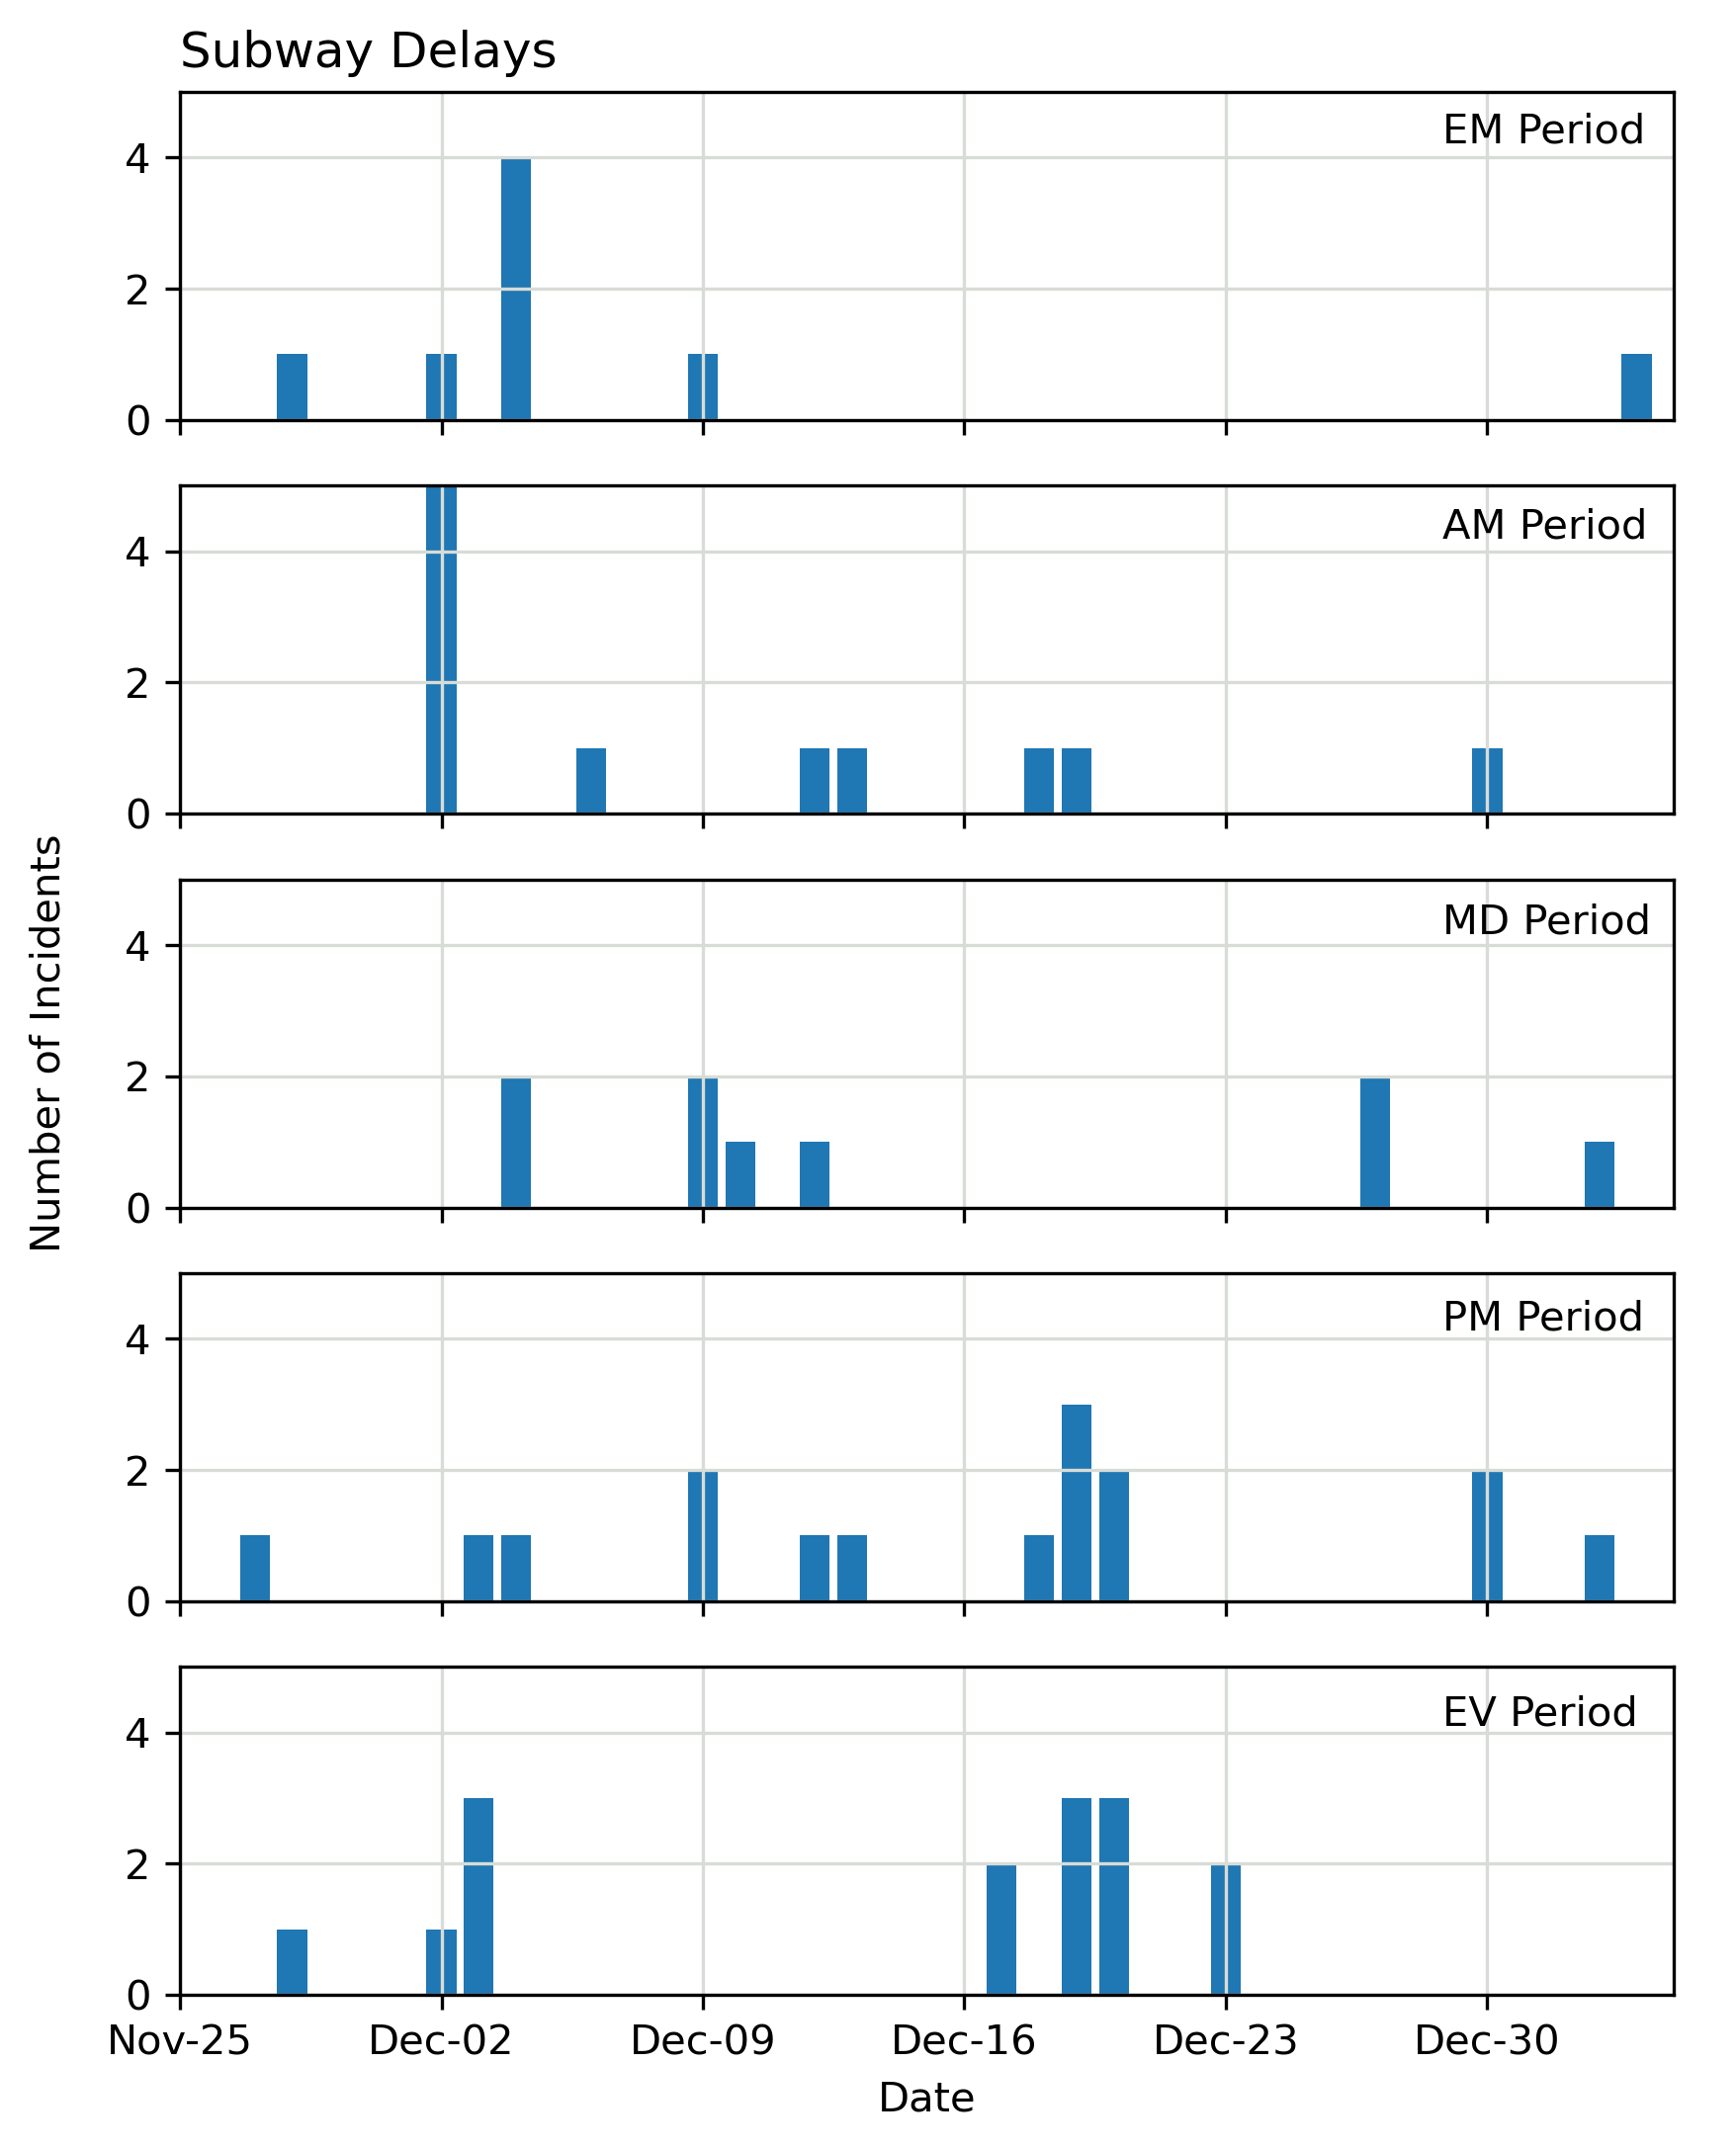

In [188]:
fig, ax = plt.subplots(5)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = summary[summary['period'] == period]
    
    ax[i].bar(df_sub['date'], df_sub['incidents'])
    
    ax[i].set_xlim([datetime.date(2019,11,26), datetime.date(2020,1,4)])
    ax[i].set_ylim([0,5])
    
    ax[i].set_xticks([datetime.date(2019,11,25),
                     datetime.date(2019,12,2),
                     datetime.date(2019,12,9),
                     datetime.date(2019,12,16),
                     datetime.date(2019,12,23),
                     datetime.date(2019,12,30)])


    if i in [0,1,2,3]:
        ax[i].set_xticklabels('')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    
        
    fig.text(s = period + ' Period', x = 0.78, y = y_str)

    ax[i].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
fig.add_subplot(111, frameon=False)


plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Subway Delays', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('subway-delay-count-major.png', dpi = 300, bbox_inches = "tight")

In [189]:
summary.to_csv('subway_delay_summary-major.csv', index = False)
cleaned.to_csv('subway_cleaned-major.csv', index = False)